In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('processed/442100110323_standard.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,2.334143
1,2019-01-01 00:15:00,2.344050
2,2019-01-01 00:30:00,2.500311
3,2019-01-01 00:45:00,2.432096
4,2019-01-01 01:00:00,2.388465
...,...,...
189883,2024-05-31 22:45:00,69.132420
189884,2024-05-31 23:00:00,69.132420
189885,2024-05-31 23:15:00,68.774401
189886,2024-05-31 23:30:00,68.765215


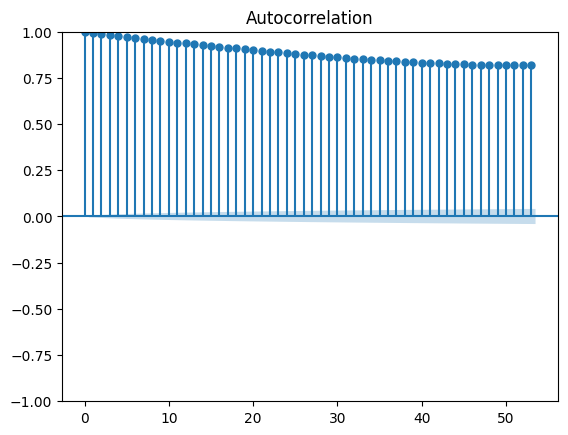

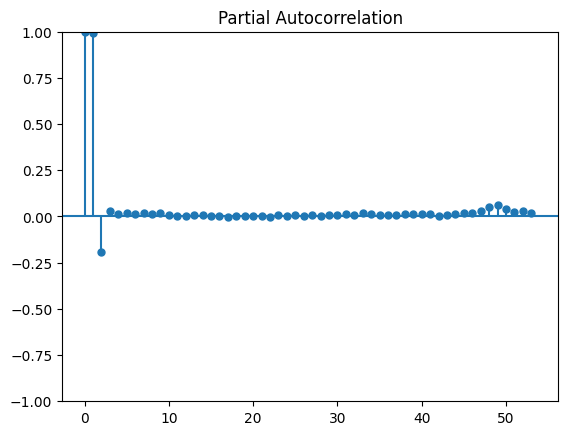

In [53]:
# plot acf dan pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df['KWH_EXP'])
plot_pacf(df['KWH_EXP'])
plt.show()

In [54]:
lags = [96, 672, 2688]
for lag in lags:
    df[f'lag_{lag}'] = df['KWH_EXP'].shift(lag)
    
df

,READ_DATE,KWH_EXP,lag_96,lag_672,lag_2688
0,2019-01-01 00:00:00,2.334143,NaN,NaN,NaN
1,2019-01-01 00:15:00,2.344050,NaN,NaN,NaN
2,2019-01-01 00:30:00,2.500311,NaN,NaN,NaN
3,2019-01-01 00:45:00,2.432096,NaN,NaN,NaN
4,2019-01-01 01:00:00,2.388465,NaN,NaN,NaN
...,...,...,...,...,...
189883,2024-05-31 22:45:00,69.132420,75.129813,68.372628,15.89499
189884,2024-05-31 23:00:00,69.132420,75.280228,68.442174,15.89499
189885,2024-05-31 23:15:00,68.774401,75.440479,68.736481,15.89499
189886,2024-05-31 23:30:00,68.765215,75.647726,68.823819,15.89499


In [55]:
df.fillna(0, inplace=True)

In [56]:
# rolling windows statistics
window = [96, 672, 2688]
for w in window:
    df[f'rolling_mean_{w}'] = df['KWH_EXP'].rolling(window=w).mean()
    df[f'rolling_std_{w}'] = df['KWH_EXP'].rolling(window=w).std()
    
df

,READ_DATE,KWH_EXP,lag_96,lag_672,lag_2688,rolling_mean_96,rolling_std_96,rolling_mean_672,rolling_std_672,rolling_mean_2688,rolling_std_2688
0,2019-01-01 00:00:00,2.334143,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 00:15:00,2.344050,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 00:30:00,2.500311,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 00:45:00,2.432096,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 01:00:00,2.388465,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
189883,2024-05-31 22:45:00,69.132420,75.129813,68.372628,15.89499,71.783938,4.898526,66.198404,7.275695,43.293859,24.334286
189884,2024-05-31 23:00:00,69.132420,75.280228,68.442174,15.89499,71.719899,4.892519,66.199431,7.276061,43.313664,24.333642
189885,2024-05-31 23:15:00,68.774401,75.440479,68.736481,15.89499,71.650460,4.886459,66.199487,7.276081,43.333337,24.332843
189886,2024-05-31 23:30:00,68.765215,75.647726,68.823819,15.89499,71.578768,4.877676,66.199400,7.276050,43.353006,24.332024


In [57]:
df.fillna(0, inplace=True)

In [58]:
# expanding window statistics
df['expanding_mean'] = df['KWH_EXP'].expanding().mean()
df['expanding_std'] = df['KWH_EXP'].expanding().std()
df

,READ_DATE,KWH_EXP,lag_96,lag_672,lag_2688,rolling_mean_96,rolling_std_96,rolling_mean_672,rolling_std_672,rolling_mean_2688,rolling_std_2688,expanding_mean,expanding_std
0,2019-01-01 00:00:00,2.334143,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.334143,NaN
1,2019-01-01 00:15:00,2.344050,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.339096,0.007005
2,2019-01-01 00:30:00,2.500311,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.392835,0.093209
3,2019-01-01 00:45:00,2.432096,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.402650,0.078596
4,2019-01-01 01:00:00,2.388465,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.399813,0.068361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189883,2024-05-31 22:45:00,69.132420,75.129813,68.372628,15.89499,71.783938,4.898526,66.198404,7.275695,43.293859,24.334286,9.678755,9.218077
189884,2024-05-31 23:00:00,69.132420,75.280228,68.442174,15.89499,71.719899,4.892519,66.199431,7.276061,43.313664,24.333642,9.679068,9.219062
189885,2024-05-31 23:15:00,68.774401,75.440479,68.736481,15.89499,71.650460,4.886459,66.199487,7.276081,43.333337,24.332843,9.679379,9.220035
189886,2024-05-31 23:30:00,68.765215,75.647726,68.823819,15.89499,71.578768,4.877676,66.199400,7.276050,43.353006,24.332024,9.679690,9.221008


In [59]:
# Trends Features daily average - avg
df['daily_avg'] = df['KWH_EXP'].rolling(window=96).mean()
df['daily_avg'] = df['daily_avg'].shift(1)

# Trends Features weekly average - avg
df['weekly_avg'] = df['KWH_EXP'].rolling(window=672).mean()
df['weekly_avg'] = df['weekly_avg'].shift(1)

# Trends Features monthly average - avg
df['monthly_avg'] = df['KWH_EXP'].rolling(window=2688).mean()
df['monthly_avg'] = df['monthly_avg'].shift(1)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189888 entries, 0 to 189887
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   READ_DATE          189888 non-null  object 
 1   KWH_EXP            189888 non-null  float64
 2   lag_96             189888 non-null  float64
 3   lag_672            189888 non-null  float64
 4   lag_2688           189888 non-null  float64
 5   rolling_mean_96    189888 non-null  float64
 6   rolling_std_96     189888 non-null  float64
 7   rolling_mean_672   189888 non-null  float64
 8   rolling_std_672    189888 non-null  float64
 9   rolling_mean_2688  189888 non-null  float64
 10  rolling_std_2688   189888 non-null  float64
 11  expanding_mean     189888 non-null  float64
 12  expanding_std      189887 non-null  float64
 13  daily_avg          189792 non-null  float64
 14  weekly_avg         189216 non-null  float64
 15  monthly_avg        187200 non-null  float64
dtypes:

In [61]:
# to datetime
df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189888 entries, 0 to 189887
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   READ_DATE          189888 non-null  datetime64[ns]
 1   KWH_EXP            189888 non-null  float64       
 2   lag_96             189888 non-null  float64       
 3   lag_672            189888 non-null  float64       
 4   lag_2688           189888 non-null  float64       
 5   rolling_mean_96    189888 non-null  float64       
 6   rolling_std_96     189888 non-null  float64       
 7   rolling_mean_672   189888 non-null  float64       
 8   rolling_std_672    189888 non-null  float64       
 9   rolling_mean_2688  189888 non-null  float64       
 10  rolling_std_2688   189888 non-null  float64       
 11  expanding_mean     189888 non-null  float64       
 12  expanding_std      189887 non-null  float64       
 13  daily_avg          189792 non-null  float64 

In [62]:
df.set_index('READ_DATE', inplace=True)

In [63]:
# Daily Features
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_year'] = df.index.dayofyear
df['week_of_year'] = df.index.isocalendar().week
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour
df['quarter'] = df.index.quarter
df['is_month_start'] = df.index.is_month_start
df['is_month_end'] = df.index.is_month_end
def determine_season(month):
    if month in [11, 12, 1, 2, 3]:
        return 0
    elif month in [4, 5, 6, 7, 8, 9, 10]:
        return 1
df['season'] = df['month'].apply(determine_season)

In [64]:
# Cyclical Features
import numpy as np
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week']/7)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year']/365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year']/365)
df['week_of_year_sin'] = np.sin(2 * np.pi * df['week_of_year']/52)
df['week_of_year_cos'] = np.cos(2 * np.pi * df['week_of_year']/52)
df['quarter_sin'] = np.sin(2 * np.pi * df['quarter']/4)
df['quarter_cos'] = np.cos(2 * np.pi * df['quarter']/4)
df['season_sin'] = np.sin(2 * np.pi * df['season']/2)
df['season_cos'] = np.cos(2 * np.pi * df['season']/2)

In [65]:
# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['KWH_EXP'], model='additive', period=96)

df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['residual'] = result.resid

In [66]:
df.isna().sum()

KWH_EXP                 0
lag_96                  0
lag_672                 0
lag_2688                0
rolling_mean_96         0
rolling_std_96          0
rolling_mean_672        0
rolling_std_672         0
rolling_mean_2688       0
rolling_std_2688        0
expanding_mean          0
expanding_std           1
daily_avg              96
weekly_avg            672
monthly_avg          2688
year                    0
month                   0
day                     0
day_of_year             0
week_of_year            0
day_of_week             0
hour                    0
quarter                 0
is_month_start          0
is_month_end            0
season                  0
hour_sin                0
hour_cos                0
day_of_week_sin         0
day_of_week_cos         0
month_sin               0
month_cos               0
day_of_year_sin         0
day_of_year_cos         0
week_of_year_sin        0
week_of_year_cos        0
quarter_sin             0
quarter_cos             0
season_sin  

In [67]:
df['trend'].describe()

count    189792.000000
mean          9.666955
std           8.656712
min           0.000000
25%           2.003020
50%           7.956431
75%          14.776279
max          72.056411
Name: trend, dtype: float64

In [68]:
df['trend'].fillna(df['trend'].median(), inplace=True)
df['residual'].fillna(df['residual'].mean(), inplace=True)
df.fillna(0, inplace=True)

/tmp/ipykernel_5602/2306207830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trend'].fillna(df['trend'].median(), inplace=True)
/tmp/ipykernel_5602/2306207830.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [69]:
# save to csv
df.to_csv('processed/442100110323_standard_enginered.csv', index=False)